In [2]:
from google.colab import drive
import tarfile
import os, cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from keras.utils import np_utils
drive.mount('/content/drive'),

Mounted at /content/drive


(None,)

In [3]:
data_path = '/content/drive/MyDrive/facial_expression/jaffe'
data_dir_list = os.listdir(data_path)

img_si=128
num_channel=1

num_epoch=10

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(img_si,img_si))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-ANGRY

Loaded the images of dataset-DISGUST

Loaded the images of dataset-FEAR

Loaded the images of dataset-NEUTRAL

Loaded the images of dataset-HAPPY

Loaded the images of dataset-SAD

Loaded the images of dataset-SURPRISE



(213, 128, 128, 3)

In [4]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:29]=0 #30
labels[30:58]=1 #29
labels[59:90]=2 #32
labels[91:121]=3 #31
labels[122:151]=4 #30
labels[152:182]=5 #31
labels[183:]=6 #30

names = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']

def getLabel(id):
    return ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'][id]

In [5]:
Y = np_utils.to_categorical(labels, num_classes)
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_test=X_test
#X_train=X_train.reshape(X_train.shape[0],128,128,1)
#X_test=X_test.reshape(X_test.shape[0],128,128,1)
x_test.shape

(43, 128, 128, 3)

In [6]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

In [7]:
input_shape=(img_si,img_si,3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
model.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation = 'softmax'))

In [8]:
input_shape=(img_si,img_si,3)

bmodel = Sequential()
bmodel.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
bmodel.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
bmodel.add(MaxPooling2D(pool_size=(2, 2)))
bmodel.add(BatchNormalization())

bmodel.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
bmodel.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
bmodel.add(MaxPooling2D(pool_size=(2, 2)))
bmodel.add(BatchNormalization())

bmodel.add(Flatten())
bmodel.add(Dense(128, activation = 'relu'))
bmodel.add(Dropout(0.5))
bmodel.add(Dense(7, activation = 'softmax'))

In [9]:
input_shape=(img_si,img_si,3)

cmodel = Sequential()
cmodel.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
cmodel.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
cmodel.add(MaxPooling2D(pool_size=(2, 2)))
cmodel.add(Dropout(0.25))

cmodel.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
cmodel.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
cmodel.add(MaxPooling2D(pool_size=(2, 2)))
cmodel.add(Dropout(0.25))

cmodel.add(Flatten())
cmodel.add(Dense(128, activation = 'relu'))
cmodel.add(Dropout(0.5))
cmodel.add(Dense(7, activation = 'softmax'))

In [10]:
input_shape=(img_si,img_si,3)

dmodel = Sequential()
dmodel.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
dmodel.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
dmodel.add(MaxPooling2D(pool_size=(2, 2)))
dmodel.add(BatchNormalization())
dmodel.add(Dropout(0.25))

dmodel.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
dmodel.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
dmodel.add(MaxPooling2D(pool_size=(2, 2)))
dmodel.add(BatchNormalization())
dmodel.add(Dropout(0.25))

dmodel.add(Flatten())
dmodel.add(Dense(128, activation = 'relu'))
dmodel.add(Dropout(0.5))
dmodel.add(Dense(7, activation = 'softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [12]:
bmodel.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [13]:
cmodel.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [14]:
dmodel.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [15]:
from keras import callbacks
filename='model_train_new.csv'
#filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"
filepath = os.path.join('checkpoint', filename)

csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
callbacks_list = [csv_log,checkpoint]
callbacks_list = [csv_log]

In [16]:
from keras import callbacks
bfilename='bmodel_train_new.csv'
#filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"
bfilepath = os.path.join('checkpoint', bfilename)

bcsv_log=callbacks.CSVLogger(bfilename, separator=',', append=False)
bcheckpoint = callbacks.ModelCheckpoint(bfilepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
bcallbacks_list = [bcsv_log,bcheckpoint]
bcallbacks_list = [bcsv_log]

In [17]:
from keras import callbacks
cfilename='cmodel_train_new.csv'
#filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"
cfilepath = os.path.join('checkpoint', cfilename)

ccsv_log=callbacks.CSVLogger(cfilename, separator=',', append=False)
ccheckpoint = callbacks.ModelCheckpoint(cfilepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
ccallbacks_list = [ccsv_log,ccheckpoint]
ccallbacks_list = [ccsv_log]

In [18]:
from keras import callbacks
dfilename='dmodel_train_new.csv'
#filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"
dfilepath = os.path.join('checkpoint', dfilename)

dcsv_log=callbacks.CSVLogger(dfilename, separator=',', append=False)
dcheckpoint = callbacks.ModelCheckpoint(dfilepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
dcallbacks_list = [dcsv_log,dcheckpoint]
dcallbacks_list = [dcsv_log]

In [19]:
hist = model.fit(X_train, y_train, batch_size=7, epochs=50, verbose=1, validation_data=(X_test, y_test),callbacks=checkpoint)

Epoch 1/50
25/25 [==============================] - 47s 77ms/step - loss: 2.6970 - accuracy: 0.1924 - val_loss: 1.9507 - val_accuracy: 0.0465

Epoch 00001: val_accuracy improved from -inf to 0.04651, saving model to checkpoint/model_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model_train_new.csv/assets
Epoch 2/50
25/25 [==============================] - 1s 30ms/step - loss: 1.9471 - accuracy: 0.1384 - val_loss: 1.9466 - val_accuracy: 0.0930

Epoch 00002: val_accuracy improved from 0.04651 to 0.09302, saving model to checkpoint/model_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model_train_new.csv/assets
Epoch 3/50
25/25 [==============================] - 1s 30ms/step - loss: 1.9379 - accuracy: 0.1730 - val_loss: 1.9401 - val_accuracy: 0.1628

Epoch 00003: val_accuracy improved from 0.09302 to 0.16279, saving model to checkpoint/model_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model_train_new.csv/assets
Epoch 4/50
25/25 [==================

In [20]:
bhist = bmodel.fit(X_train, y_train, batch_size=7, epochs=50, verbose=1, validation_data=(X_test, y_test),callbacks=bcheckpoint)

Epoch 1/50
25/25 [==============================] - 6s 62ms/step - loss: 24.8170 - accuracy: 0.1837 - val_loss: 2.2277 - val_accuracy: 0.0930

Epoch 00001: val_accuracy improved from -inf to 0.09302, saving model to checkpoint/bmodel_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/bmodel_train_new.csv/assets
Epoch 2/50
25/25 [==============================] - 1s 31ms/step - loss: 3.3531 - accuracy: 0.2557 - val_loss: 1.9817 - val_accuracy: 0.0698

Epoch 00002: val_accuracy did not improve from 0.09302
Epoch 3/50
25/25 [==============================] - 1s 31ms/step - loss: 1.9331 - accuracy: 0.1328 - val_loss: 1.9552 - val_accuracy: 0.0698

Epoch 00003: val_accuracy did not improve from 0.09302
Epoch 4/50
25/25 [==============================] - 1s 30ms/step - loss: 2.6483 - accuracy: 0.1112 - val_loss: 1.9464 - val_accuracy: 0.0930

Epoch 00004: val_accuracy did not improve from 0.09302
Epoch 5/50
25/25 [==============================] - 1s 31ms/step - loss: 1.9368 - accur

In [21]:
chist = cmodel.fit(X_train, y_train, batch_size=7, epochs=50, verbose=1, validation_data=(X_test, y_test),callbacks=ccheckpoint)

Epoch 1/50
25/25 [==============================] - 3s 56ms/step - loss: 2.2297 - accuracy: 0.1644 - val_loss: 1.9490 - val_accuracy: 0.0465

Epoch 00001: val_accuracy improved from -inf to 0.04651, saving model to checkpoint/cmodel_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/cmodel_train_new.csv/assets
Epoch 2/50
25/25 [==============================] - 1s 31ms/step - loss: 1.9470 - accuracy: 0.1652 - val_loss: 1.9487 - val_accuracy: 0.0465

Epoch 00002: val_accuracy did not improve from 0.04651
Epoch 3/50
25/25 [==============================] - 1s 31ms/step - loss: 1.9457 - accuracy: 0.1718 - val_loss: 1.9500 - val_accuracy: 0.0465

Epoch 00003: val_accuracy did not improve from 0.04651
Epoch 4/50
25/25 [==============================] - 1s 30ms/step - loss: 1.9445 - accuracy: 0.1585 - val_loss: 1.9514 - val_accuracy: 0.0465

Epoch 00004: val_accuracy did not improve from 0.04651
Epoch 5/50
25/25 [==============================] - 1s 31ms/step - loss: 1.9455 - accura

In [22]:
dhist = dmodel.fit(X_train, y_train, batch_size=7, epochs=50, verbose=1, validation_data=(X_test, y_test),callbacks=dcheckpoint)

Epoch 1/50
25/25 [==============================] - 3s 58ms/step - loss: 17.7766 - accuracy: 0.1331 - val_loss: 5.1430 - val_accuracy: 0.0465

Epoch 00001: val_accuracy improved from -inf to 0.04651, saving model to checkpoint/dmodel_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/dmodel_train_new.csv/assets
Epoch 2/50
25/25 [==============================] - 1s 32ms/step - loss: 2.2462 - accuracy: 0.1790 - val_loss: 1.9431 - val_accuracy: 0.0930

Epoch 00002: val_accuracy improved from 0.04651 to 0.09302, saving model to checkpoint/dmodel_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/dmodel_train_new.csv/assets
Epoch 3/50
25/25 [==============================] - 1s 31ms/step - loss: 1.9202 - accuracy: 0.1712 - val_loss: 2.0027 - val_accuracy: 0.0930

Epoch 00003: val_accuracy did not improve from 0.09302
Epoch 4/50
25/25 [==============================] - 1s 30ms/step - loss: 2.1137 - accuracy: 0.1428 - val_loss: 1.9430 - val_accuracy: 0.0930

Epoch 00004: va

<Figure size 432x288 with 0 Axes>

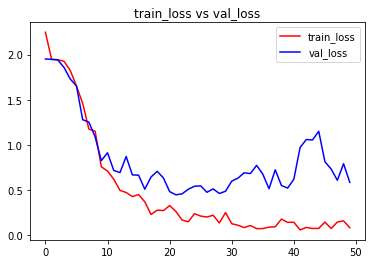

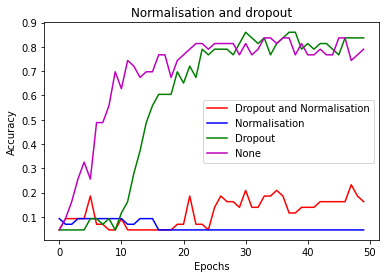

<Figure size 432x288 with 0 Axes>

In [23]:
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
bval_acc=bhist.history['val_accuracy']
cval_acc=chist.history['val_accuracy']
dval_acc=dhist.history['val_accuracy']

epochs = range(len(train_acc))

pyplot.plot(epochs,train_loss,'r', label='train_loss')
pyplot.plot(epochs,val_loss,'b', label='val_loss')
pyplot.title('train_loss vs val_loss')
pyplot.legend()
pyplot.figure()

pyplot.plot(epochs,dval_acc,'r', label='Dropout and Normalisation')
pyplot.plot(epochs,bval_acc,'b', label='Normalisation')
pyplot.plot(epochs,cval_acc,'g', label='Dropout')
pyplot.plot(epochs,val_acc,'m', label='None')
pyplot.title('Normalisation and dropout')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend()
pyplot.figure()